<a href="https://colab.research.google.com/github/yassine-cherni/NLP/blob/main/MODEL1_ANN_0%2C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install librosa

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
filename='/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSIST/ACTIVATE LANE ASSIST 1.wav'

In [14]:
import IPython.display as ipd
import librosa
import librosa.display

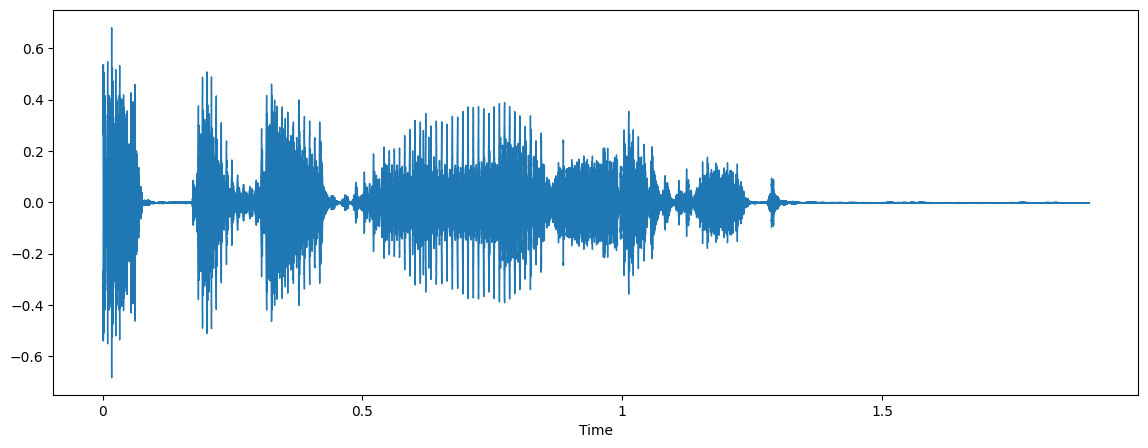

In [15]:
### ACTIVATE LANE ASSIST
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [16]:
sample_rate

22050

In [17]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [18]:
wave_sample_rate

44100

In [19]:
wave_audio

array([-17344, -17093, -16251, ...,      0,      0,      0], dtype=int16)

In [20]:
data

array([-3.9198929e-01, -5.3670299e-01, -3.7663388e-01, ...,
        3.1145009e-05,  2.3640645e-05, -2.4563869e-06], dtype=float32)

In [21]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/DATA/C.csv')
metadata.head(10)

,file_path,label
0,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
1,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
2,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
3,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
4,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
5,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
6,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
7,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
8,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
9,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST


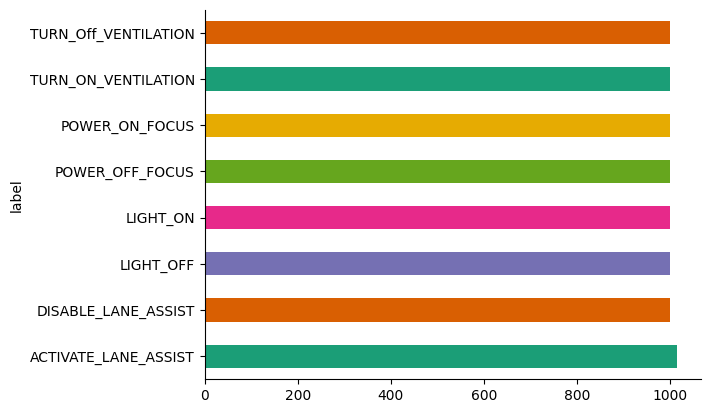

In [22]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
metadata.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/DATA/LIGHT_ON/Light On 1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [24]:
print(librosa_audio_data)

[1.1139107e-01 1.6094768e-01 1.3933663e-01 ... 4.4824856e-06 3.5467106e-05
 2.1442820e-05]


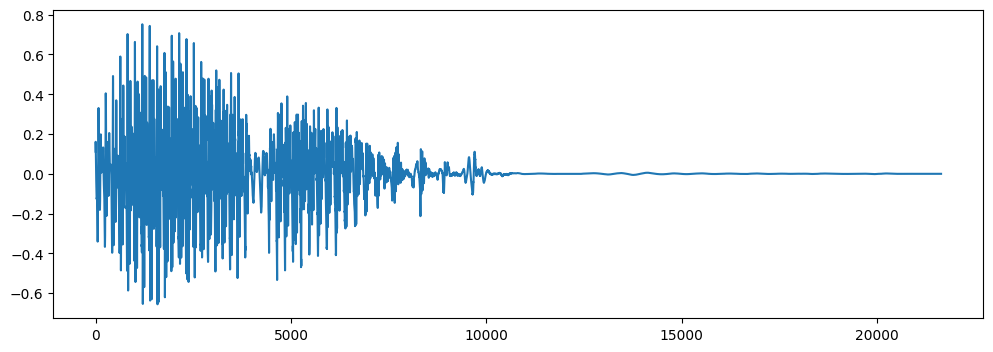

In [25]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [26]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [27]:
wave_audio

array([4948, 4918, 4875, ...,    1,    1,    1], dtype=int16)

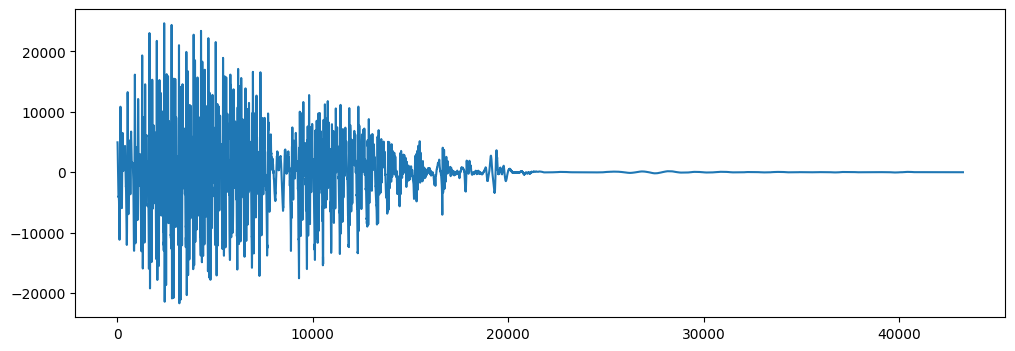

In [28]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [29]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 43)


In [30]:
mfccs

array([[-1.7860655e+02, -1.6245677e+02, -1.3403020e+02, ...,
        -5.6873822e+02, -5.7341876e+02, -5.7646259e+02],
       [ 1.7061661e+02,  1.9798828e+02,  1.9451210e+02, ...,
         1.0908456e+01,  4.3022022e+00,  0.0000000e+00],
       [ 3.1078003e+01,  8.7846270e+00, -4.6369385e+01, ...,
         1.0862291e+01,  4.2951040e+00,  0.0000000e+00],
       ...,
       [-2.6715555e+00,  3.2460093e-01, -3.2589668e-01, ...,
         1.2557671e+00,  1.8302801e+00,  0.0000000e+00],
       [-3.5007405e+00, -7.0922036e+00, -5.9299603e+00, ...,
         1.1156411e+00,  1.7327014e+00,  0.0000000e+00],
       [-1.5479732e+00, -4.9762597e+00, -4.7699380e+00, ...,
         9.9213678e-01,  1.6359668e+00,  0.0000000e+00]], dtype=float32)

In [31]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/DATA'
metadata=pd.read_csv('/content/drive/MyDrive/DATA/C.csv')
metadata.head()

,file_path,label
0,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
1,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
2,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
3,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST
4,/content/drive/MyDrive/DATA/ACTIVATE_LANE_ASSI...,ACTIVATE_LANE_ASSIST


In [32]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.0 MB/s eta 0:00:00


In [33]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features